# Sharpe Ratio and Portfolio Values

In [1]:
import pandas as pd

In [2]:
import quandl

## Create a Portfolio

In [7]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2019-01-01')

In [8]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [5]:
# Alternative
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [9]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

In [11]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
2012-01-10,54.392239
2012-01-11,54.303564
2012-01-12,54.154488
2012-01-13,53.951436


## Normalize Prices

This is the same as cumulative daily returns

In [12]:
# Example
aapl.iloc[0]['Adj. Close']

52.848786580038

In [13]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [14]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [15]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2018-03-21,171.270,3.240756
2018-03-22,168.845,3.194870
2018-03-23,164.940,3.120980
2018-03-26,172.770,3.269138
2018-03-27,168.340,3.185314


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [16]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [17]:
aapl.tail()

,Adj. Close,Normed Return,Allocation
Date,,,
2018-03-21,171.270,3.240756,0.972227
2018-03-22,168.845,3.194870,0.958461
2018-03-23,164.940,3.120980,0.936294
2018-03-26,172.770,3.269138,0.980742
2018-03-27,168.340,3.185314,0.955594


## Investment

Let's pretend we invested a million dollars in this portfolio

In [18]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*10000

## Total Portfolio Value

In [19]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [20]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,3000.000000,2000.000000,4000.000000,1000.000000
2012-01-04,3016.122365,2038.647343,3983.682233,991.509803
2012-01-05,3049.607276,2031.132582,3964.787976,992.068368
2012-01-06,3081.487246,2023.617821,3919.269995,1019.996649
2012-01-09,3076.599470,2036.500268,3898.872786,997.374742


In [21]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [22]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,3000.000000,2000.000000,4000.000000,1000.000000
2012-01-04,3016.122365,2038.647343,3983.682233,991.509803
2012-01-05,3049.607276,2031.132582,3964.787976,992.068368
2012-01-06,3081.487246,2023.617821,3919.269995,1019.996649
2012-01-09,3076.599470,2036.500268,3898.872786,997.374742


In [23]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [24]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,3000.000000,2000.000000,4000.000000,1000.000000,10000.000000
2012-01-04,3016.122365,2038.647343,3983.682233,991.509803,10029.961743
2012-01-05,3049.607276,2031.132582,3964.787976,992.068368,10037.596202
2012-01-06,3081.487246,2023.617821,3919.269995,1019.996649,10044.371710
2012-01-09,3076.599470,2036.500268,3898.872786,997.374742,10009.347266


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

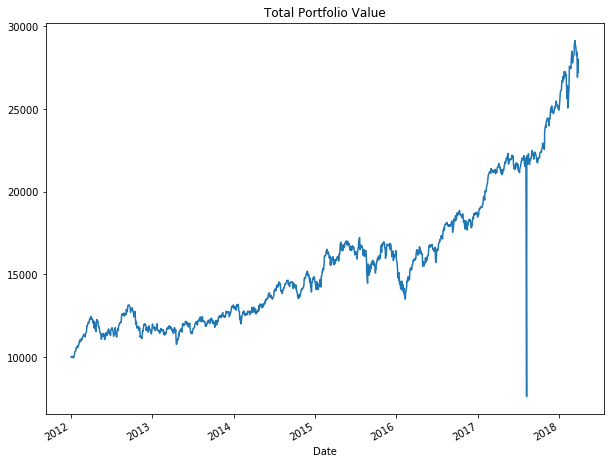

In [26]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

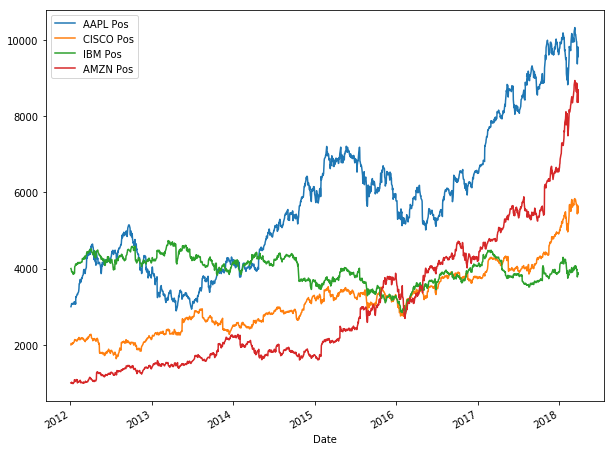

In [28]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8),kind='line');

In [29]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2018-03-21,9722.266740,5674.461589,3977.449407,8835.725856,28209.903592
2018-03-22,9584.609842,5515.663748,3860.682113,8624.811484,27585.767187
2018-03-23,9362.939663,5432.422943,3779.452691,8353.683740,26928.499038
2018-03-26,9807.415336,5642.445895,3893.173882,8690.498799,28033.533912
2018-03-27,9555.943148,5465.719265,3856.112958,8362.006368,27239.781739


# Portfolio Statistics
### Daily Returns

In [30]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [31]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,3000.000000,2000.000000,4000.000000,1000.000000,10000.000000,NaN
2012-01-04,3016.122365,2038.647343,3983.682233,991.509803,10029.961743,0.002996
2012-01-05,3049.607276,2031.132582,3964.787976,992.068368,10037.596202,0.000761
2012-01-06,3081.487246,2023.617821,3919.269995,1019.996649,10044.371710,0.000675
2012-01-09,3076.599470,2036.500268,3898.872786,997.374742,10009.347266,-0.003487


### Cumulative Return

In [32]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 172.39781738780346 was percent!


### Avg Daily Return

In [33]:
portfolio_val['Daily Return'].mean()

0.001492730590095444

### Std Daily Return

In [34]:
portfolio_val['Daily Return'].std()

0.05213018140551363

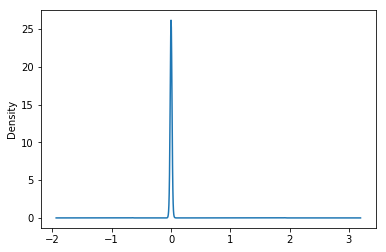

In [36]:
portfolio_val['Daily Return'].plot(kind='kde');

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [37]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [38]:
SR

0.02863467093052477

In [39]:
ASR = (252**0.5)*SR

In [40]:
ASR

0.4545613089380342

In [41]:
portfolio_val['Daily Return'].std()

0.05213018140551363

In [42]:
portfolio_val['Daily Return'].mean()

0.001492730590095444

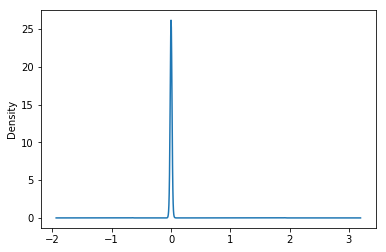

In [44]:
portfolio_val['Daily Return'].plot('kde')

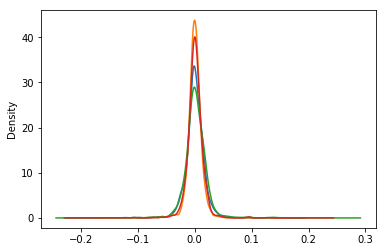

In [45]:
aapl['Adj. Close'].pct_change(1).plot('kde')
ibm['Adj. Close'].pct_change(1).plot('kde')
amzn['Adj. Close'].pct_change(1).plot('kde')
cisco['Adj. Close'].pct_change(1).plot('kde')

In [46]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

# Great Job!